<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict House Price

# 캐글 데이터 불러오기

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choibohye","key":"b82e31a50310da16da34248c963dfa0b"}'}

In [ ]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Jan 31 06:47 kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

#permission warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
ls

kaggle.json  sample_data/


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         87           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        147           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        353           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2179           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      16871            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4670            True  
connectx

In [ ]:
!kaggle datasets download -d harlfoxem/housesalesprediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 53.2MB/s]


In [ ]:
!ls

housesalesprediction.zip  kaggle.json  sample_data


In [ ]:
!unzip housesalesprediction.zip

Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


# 데이터 불러오기

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

url = 'kc_house_data.csv'

In [ ]:
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 데이터 전처리 & EDA

2014년 data: training set

2015년 data: test set

In [ ]:
df.info() # date가 object로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# data의 object type을 날짜데이터로 변경
import datetime
df = df.astype({'date': 'datetime64[ns]'})
print(df['date'].dtype)
df.head()

datetime64[ns]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Missing Data**
- 결측치가 없는 깔끔한 데이터이다

In [ ]:
df.isnull().sum() # 결측치가 없다

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Feature별 의미
id - Unique ID for each home sold: **Price에 관련없음**

date - Date of the home sale **데이터 나눈 기준**

price - Price of each home sold **Target**

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
df.drop(['id'], axis = 1, inplace=True) # id는 의미없기에 삭제

# Train & Test set으로 나누기

In [ ]:
train = df[df['date']<datetime.datetime(2015,1,1)] # 2014년 데이터
test = df[df['date']>=datetime.datetime(2015,1,1)] # 2015년 데이터
print('2014년 데이터(=Train)의 수: ', len(train))
print('2015년 데이터(=Test)의 수:   ' , len(test))
print('Train set과 Test set의 합은 %d 개 (=전체: %d 개)입니다.' %(len(train)+len(test), len(df)))

x_train = train.drop(['price','date'], axis=1, inplace=False) # 2014년 데이터의 정답값 제외
x_test = test.drop(['price','date'], axis=1, inplace=False) # 2015년 데이터의 정답값 제외
y_train = train['price'] # 2014년 데이터의 정답값
y_test = test['price'] # 2015년 데이터의 정답값

2014년 데이터(=Train)의 수:  14633
2015년 데이터(=Test)의 수:    6980
Train set과 Test set의 합은 21613 개 (=전체: 21613 개)입니다.


# Target 분석: Price
House Price는 ~2000000에 몰려있다

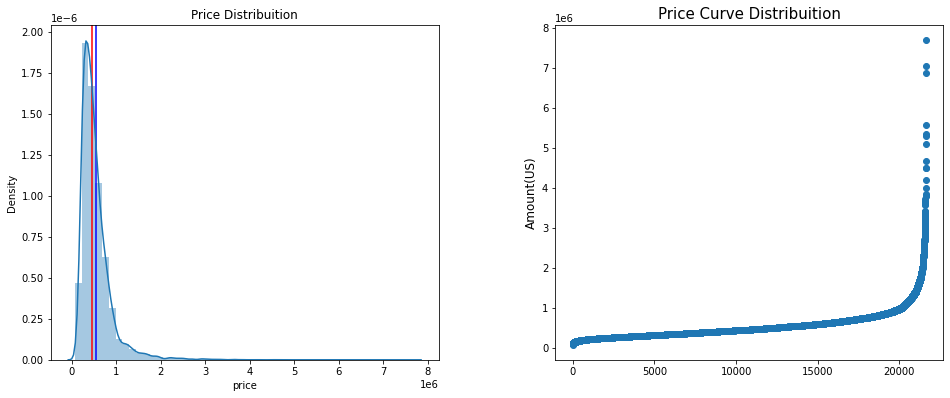

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize = (16, 6))

plt.subplot(121)
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values)) #(0~데이터갯수, 집값 sort값)
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5, top = 0.9)
plt.show();

# Feature간의 연관성 분석
1. price(target)과 다른 feature들의 상관관계 분석
2. Bedroom과 Bathroom의 연관성 확인
3. 위도와 경도를 활용한 scatter plot

## Correlation Coefficient (Pearson)
- 상관 계수 값의 범위는 −1부터 +1까지입니다.
- 계수의 절대값이 클수록 변수 사이에 강한 관계가 있습니다.
- Pearson 상관의 경우 절대값 1은 완전한 선형 관계를 나타냅니다.
- 0에 가까운 상관 값은 변수 사이에 선형 관계가 없음을 나타냅니다.

1. price는 sqrt_living - grade - sqrt_above 순으로 correlation이 높았다
2. bedroom과 bathroom의 상관계수는 0.52
3. 면적을 나타내는 것끼리 높은 상관계수를 나타냈다. 따라서 독립변수간에 강한 상관관계가 존재하므로 회귀계수에는 부정적인 영향을 미칠 수 있다.

## Pearson Correlation Coefficient의 결과를 통해 획득한 Feature간 상관관계가 낮은 독립변수
1. sqft_living (sqft_above / sqft_living15 / sqft_basement / sqft_lot / sqft_lot15)
2. grade
3. bathrooms (bedrooms)
4. view (waterfront)
5. lat
6. floor
7. yr_renovated (yr_built)
8. condition
9. long
10. zipcode

**Pearson 상관계수를 통한 Feature 관계 확인**

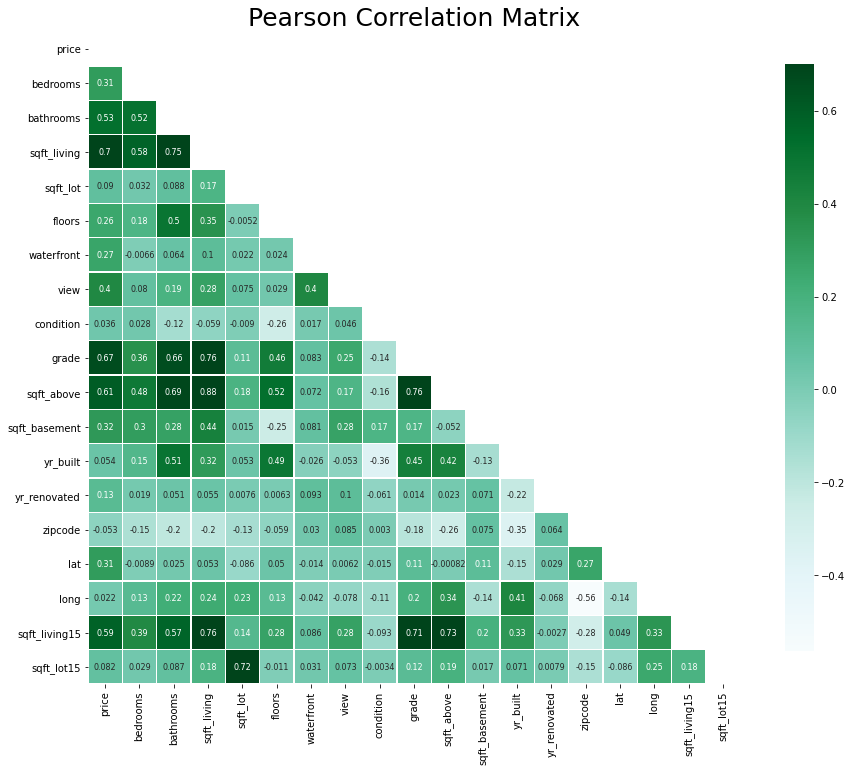

In [ ]:
# 모든 Feature에 대한 Correlation Coefficient

pearson = df.corr()
mask = np.zeros_like((pearson), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(pearson,linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

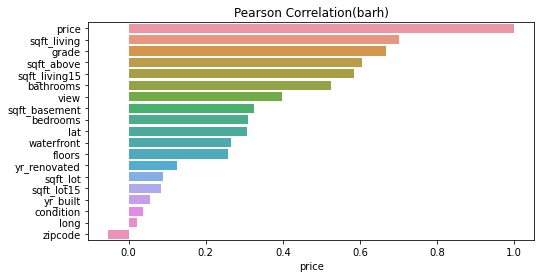

In [ ]:
# Price의 Pearson 상관관계
plt.figure(figsize=(8,4))
sns.barplot(pearson.sort_values('price',ascending=False).price, pearson.sort_values('price',ascending=False).price.index,orient='h')
plt.title('Pearson Correlation(barh)')
plt.show();

- 1차적으로 Price의 correlation을 보면 sqft_living과 관련이 가장 높기 때문에 keep!

- sqft_living과 (grade, sqft가 들어간 feature, bathrooms) 의 상관관계를 확인해서 sqft_living과 관련성이 높으면 해당 feature 사용하지 않음

**1. sqft_living과 면적의 관계**

sqft_living feature 사용

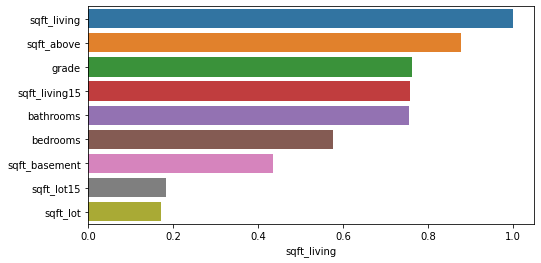

In [ ]:
# 면적에 관한 Feature
plt.figure(figsize=(8,4))
sq = df[['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15','grade','bathrooms','bedrooms']]
sns.barplot(sq.corr().sort_values('sqft_living',ascending=False).sqft_living, sq.corr().sort_values('sqft_living',ascending=False).sqft_living.index,orient='h');

**2. room과의 관계**

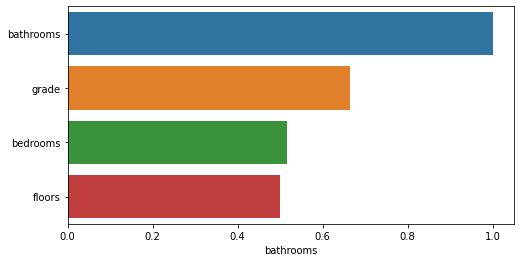

In [ ]:
# 면적에 관한 Feature
plt.figure(figsize=(8,4))
sq = df[['bedrooms', 'bathrooms','floors', 'grade']]
sns.barplot(sq.corr().sort_values('bathrooms',ascending=False).bathrooms, sq.corr().sort_values('bathrooms',ascending=False).bathrooms.index,orient='h');

Price와의 correlation이 높은 feature들이 서로 연관이 높은 것 같아서 feature 선택이 어려워서 다른 방법을 활용 - Feature Selection

## [Special] 위도와 경도를 이용한 시각화

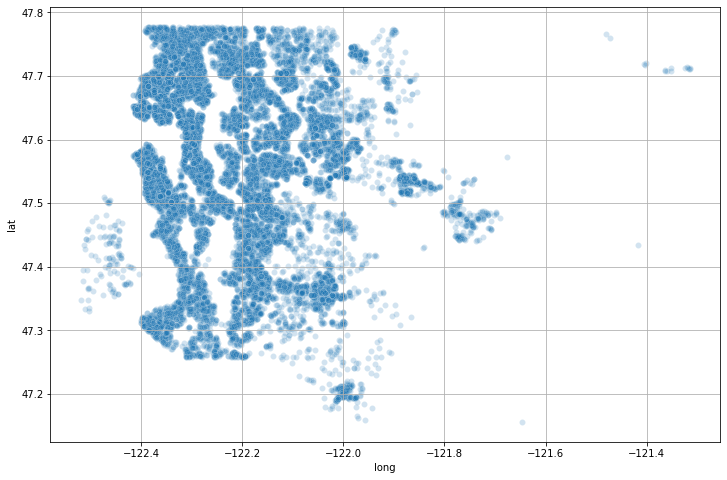

In [ ]:
# 서쪽으로 갈수록 사람이 많이 모여산다
map = df[['lat','long','price']] # 가로축 long(경도), 세로축 lat(위도)
plt.figure(figsize=(12,8))
sns.scatterplot(map['long'],map.lat, alpha=0.2)
plt.grid();
plt.show();

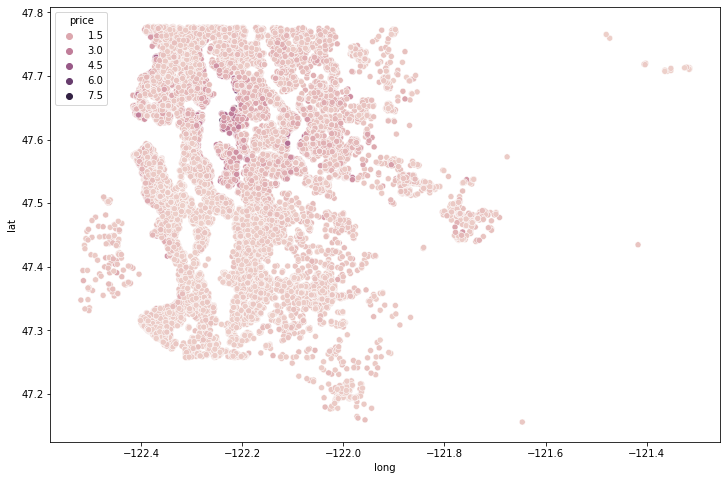

In [ ]:
# Price 기준으로 색칠
plt.figure(figsize=(12,8))
sns.scatterplot('long','lat',hue='price' ,data=map)
sns.set_style('whitegrid')
plt.show()

# 차원축소 (Feature Selection)

In [ ]:
house = df.copy()
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression

# First extract the target variable which is our House prices
Y = house.price.values

# Drop price from the df dataframe and create a matrix out of the df data
house = house.drop(['price','date'], axis=1)
X = np.array(house)

# Store the column/feature names into a list "colnames"
colnames = house.columns
print('X의 shape: ', X.shape)
print('Y의 shape: ', Y.shape)

selector1 = SelectFromModel(estimator=LogisticRegression()).fit(X, Y)
# print(selector1.estimator_.coef_)
X_new = selector1.transform(X)
print('SelecFromModel의 결과의 shape: ',X_new.shape)
print('SelecFromModel의 결과의 유의미한 Feature의 threshold: ', selector1.threshold_)

result = pd.DataFrame(columns=colnames)
result.loc['Feautre Support'] = selector1.get_support()

X의 shape:  (21613, 18)
Y의 shape:  (21613,)
SelecFromModel의 결과의 shape:  (21613, 6)
SelecFromModel의 결과의 유의미한 Feature의 threshold:  0.03439171136794966


In [ ]:
selector2 = RFE(estimator=LogisticRegression()).fit(X,Y)

result.loc['8-Features RFE'] = selector2.support_
result.loc['RFE Ranking'] = selector2.ranking_
result

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Feautre Support,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,True
8-Features RFE,False,False,True,True,False,False,False,False,False,True,True,True,True,True,False,False,True,True
RFE Ranking,4,3,1,1,6,10,5,8,2,1,1,1,1,1,9,7,1,1


# 차원축소 (PCA)

# Baseline Model

In [ ]:
table_col = ['MAE','MSE','RMSE','R2', 'Linear Regression']
table = pd.DataFrame(columns=table_col)

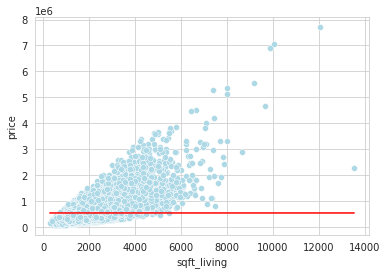

In [ ]:
# Price의 중간값을 기준모델로 사용
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

base = train['price'].median()

# 기준모델의 MAE, MSE, RMSE, R2 계산
mae_base = mean_absolute_error(y_train, [base]*len(y_train))
mse_base = mean_squared_error(y_train, [base]*len(y_train))
rmse_base = math.sqrt(mse_base)
r_base = r2_score(y_train, [base]*len(y_train))

table.loc['Train: Base-Price'] = [int(mae_base), int(mse_base), int(rmse_base), '{:.3f}'.format(r_base), base]

sns.lineplot(x=df['sqft_living'], y =df['price'].mean(), color = 'red');
sns.scatterplot(x=df['sqft_living'], y=df['price'], color='lightblue');

# Simple Linear Regression

In [ ]:
y_train.head()

0     221900.0
1     538000.0
3     604000.0
5    1225000.0
6     257500.0
Name: price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
column = x_train.columns
for i in column:
  model = LinearRegression()

  X_train = np.array(x_train[i], dtype=pd.Series).reshape(-1,1)
  X_test = np.array(x_test[i], dtype=pd.Series).reshape(-1,1)

  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  mae_train = mean_absolute_error(y_test, y_pred)
  mse_train = mean_squared_error(y_test, y_pred)
  rmse_train = math.sqrt(mse_train)
  r_train = r2_score(y_test, y_pred)

  intercept = model.intercept_
  feature1 = model.coef_[0]

  table.loc['Test: %s-Price' %(i)] = [int(mae_train), int(mse_train), int(rmse_train), '{:.3f}'.format(r_train), 'y = (%.1f) + (%.1f)x1'%(intercept, feature1)]
table

,MAE,MSE,RMSE,R2,Linear Regression
Train: Base-Price,221410,144225108437,379769,-0.058,450000
Test: bedrooms-Price,221872,119059650870,345050,0.096,y = (131937.3) + (120587.7)x1
Test: bathrooms-Price,207421,97379911805,312057,0.260,y = (-2254.1) + (254326.0)x1
Test: sqft_living-Price,179300,71091691178,266630,0.460,y = (-54462.9) + (282.9)x1
Test: sqft_lot-Price,232444,130345089713,361033,0.010,y = (526722.6) + (0.8)x1
Test: floors-Price,224175,123848615057,351921,0.059,y = (269780.0) + (179286.5)x1
Test: waterfront-Price,229178,123300087100,351141,0.063,y = (530258.1) + (1145394.0)x1
Test: view-Price,219278,111234959621,333519,0.155,y = (494355.0) + (191909.0)x1
Test: condition-Price,233447,131577431420,362736,0.000,y = (461356.0) + (22690.2)x1
Test: grade-Price,178801,74165850195,272334,0.437,y = (-1073536.0) + (209947.1)x1


# y_test의 실제값과 predict값 비교하기 (Acc)


# T-test & Chi-Square
- Chi-Square: Categorical
- T-Test: Numerical